In [2]:
import xarray as xr
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path = f'/gxfs_work/geomar/smomw523/master-thesis/output_data/retention/tiefenunabhängig/'

In [4]:
import warnings
warnings.filterwarnings('ignore')

all_files = glob.glob(os.path.join(path, "2*.csv"))
dates = pd.date_range(start='2009-01-01', end='2009-12-31', freq = '5D')

df = pd.concat((pd.read_csv(f, usecols=[1,2,3,4], index_col=2) for f in all_files), keys=dates)
df.index.names = ['start_date', 'depthdiff']
df['INALT-obs'] = np.where(df['INALT-obs'] == -1, 43, df['INALT-obs'])

df_ROMS = pd.concat((pd.read_csv(f, usecols=[5,6,7,8], index_col=2) for f in all_files), keys=dates)
df_ROMS.index.names = ['start_date', 'depthdiff']
df_ROMS['ROMS-obs'] = np.where(df_ROMS['ROMS-obs'] == -1, 43, df_ROMS['ROMS-obs'])

df_ROMSchild = pd.concat((pd.read_csv(f, usecols=[9,10,11,12], index_col=2) for f in all_files), keys=dates)
df_ROMSchild.index.names = ['start_date', 'depthdiff']
df_ROMSchild['ROMSchild-obs'] = np.where(df_ROMSchild['ROMSchild-obs'] == -1, 43, df_ROMSchild['ROMSchild-obs'])

In [5]:
df_ROMS

ROMS-obs       ROMS-z  ROMS-distance
start_date depthdiff                                        
2009-01-01 204.192615          1  1071.117077       2.578153
           273.760084          0   908.402636       0.000000
           1220.038857         1   403.327842       4.611108
           1071.306037         0   554.087640       0.000000
           73.837233           1  1369.212571       9.283469
...                          ...          ...            ...
2009-12-27 420.333041          2  1253.201872       6.490830
           962.379325          2   520.062569       7.483616
           510.470410          1   575.228809       3.133122
           822.379534          0   936.673079       0.136683
           1602.775990         2   424.175182       8.520636

[7300000 rows x 3 columns]

In [6]:
#bottom layer in ROMS 10-15m at seamount

df.dropna(subset=['INALT-obs'], inplace=True)
df_ROMS.dropna(subset=['ROMS-obs'], inplace=True)
df_ROMSchild.dropna(subset=['ROMSchild-obs'], inplace=True)

binned_df = df.groupby(['start_date', pd.cut(df.index.get_level_values('depthdiff'), bins=range(0, 1500, 15))])['INALT-obs'].mean().unstack()
binned_df_ROMS = df_ROMS.groupby(['start_date', pd.cut(df_ROMS.index.get_level_values('depthdiff'), bins=range(0, 1500, 15))])['ROMS-obs'].mean().unstack()
binned_df_ROMSchild = df_ROMSchild.groupby(['start_date', pd.cut(df_ROMSchild.index.get_level_values('depthdiff'), bins=range(0, 1500, 15))])['ROMSchild-obs'].mean().unstack()

depth_midpoints = [int(depth.mid) for depth in binned_df.columns]
depth_midpoints_ROMS = [int(depth.mid) for depth in binned_df_ROMS.columns]
depth_midpoints_ROMSchild = [int(depth.mid) for depth in binned_df_ROMSchild.columns]

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


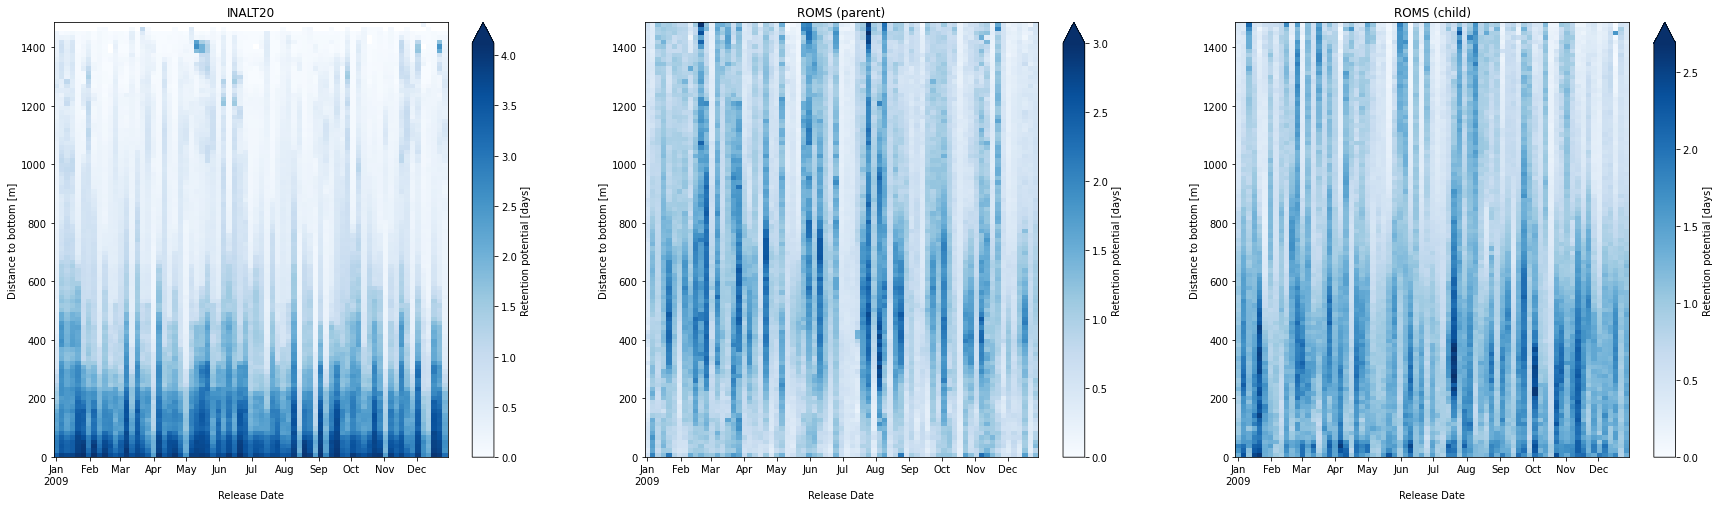

In [7]:
plt.rcParams['font.size'] = 27
plt.rcParams['font.family'] = 'Arial'

plt.figure(figsize=(30, 8))
cmap = plt.get_cmap('Blues')  # Verwenden Sie Ihre bevorzugte Farbkarte
xlabel = 'Release Date'
xticksloc = ['2009-01','2009-02','2009-03','2009-04','2009-05','2009-06','2009-07','2009-08','2009-09','2009-10','2009-11','2009-12']
xtickslab = ['Jan\n2009','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']        
#yticksloc = [0,150,300,450,600,750,900,1050,1200,1350,1500]

plt.subplot(1,3,1)
cf = plt.pcolormesh(binned_df.index, depth_midpoints, binned_df.values.T/binned_df.mean().mean(), cmap=cmap)#, vmin =0,vmax=40)
plt.xlabel(xlabel)
plt.xticks(xticksloc,xtickslab)
#plt.yticks(yticksloc) 
plt.ylabel('Distance to bottom [m]')
plt.title('INALT20')
plt.colorbar(cf, label='Retention potential [days]', extend='max')

plt.subplot(1,3,2)
cf = plt.pcolormesh(binned_df_ROMS.index, depth_midpoints_ROMS, binned_df_ROMS.values.T/binned_df_ROMS.mean().mean(), cmap=cmap)#, vmin =0,vmax=10)
plt.xlabel(xlabel)
plt.xticks(xticksloc,xtickslab) 
#plt.yticks(yticksloc) 
plt.ylabel('Distance to bottom [m]')
plt.title('ROMS (parent)')
plt.colorbar(cf, label='Retention potential [days]', extend='max')

plt.subplot(1,3,3)
cf = plt.pcolormesh(binned_df_ROMSchild.index, depth_midpoints_ROMSchild, binned_df_ROMSchild.values.T/binned_df_ROMSchild.mean().mean(), cmap=cmap)#, vmin =0,vmax=6)
plt.xlabel(xlabel)
plt.xticks(xticksloc,xtickslab) 
#plt.yticks(yticksloc) 
plt.ylabel('Distance to bottom [m]')
plt.title('ROMS (child)')
plt.colorbar(cf, label='Retention potential [days]', extend='max')

plt.show()

In [77]:
binned_df.index

DatetimeIndex(['2009-01-01', '2009-01-06', '2009-01-11', '2009-01-16',
               '2009-01-21', '2009-01-26', '2009-01-31', '2009-02-05',
               '2009-02-10', '2009-02-15', '2009-02-20', '2009-02-25',
               '2009-03-02', '2009-03-07', '2009-03-12', '2009-03-17',
               '2009-03-22', '2009-03-27', '2009-04-01', '2009-04-06',
               '2009-04-11', '2009-04-16', '2009-04-21', '2009-04-26',
               '2009-05-01', '2009-05-06', '2009-05-11', '2009-05-16',
               '2009-05-21', '2009-05-26', '2009-05-31', '2009-06-05',
               '2009-06-10', '2009-06-15', '2009-06-20', '2009-06-25',
               '2009-06-30', '2009-07-05', '2009-07-10', '2009-07-15',
               '2009-07-20', '2009-07-25', '2009-07-30', '2009-08-04',
               '2009-08-09', '2009-08-14', '2009-08-19', '2009-08-24',
               '2009-08-29', '2009-09-03', '2009-09-08', '2009-09-13',
               '2009-09-18', '2009-09-23', '2009-09-28', '2009-10-03',
      

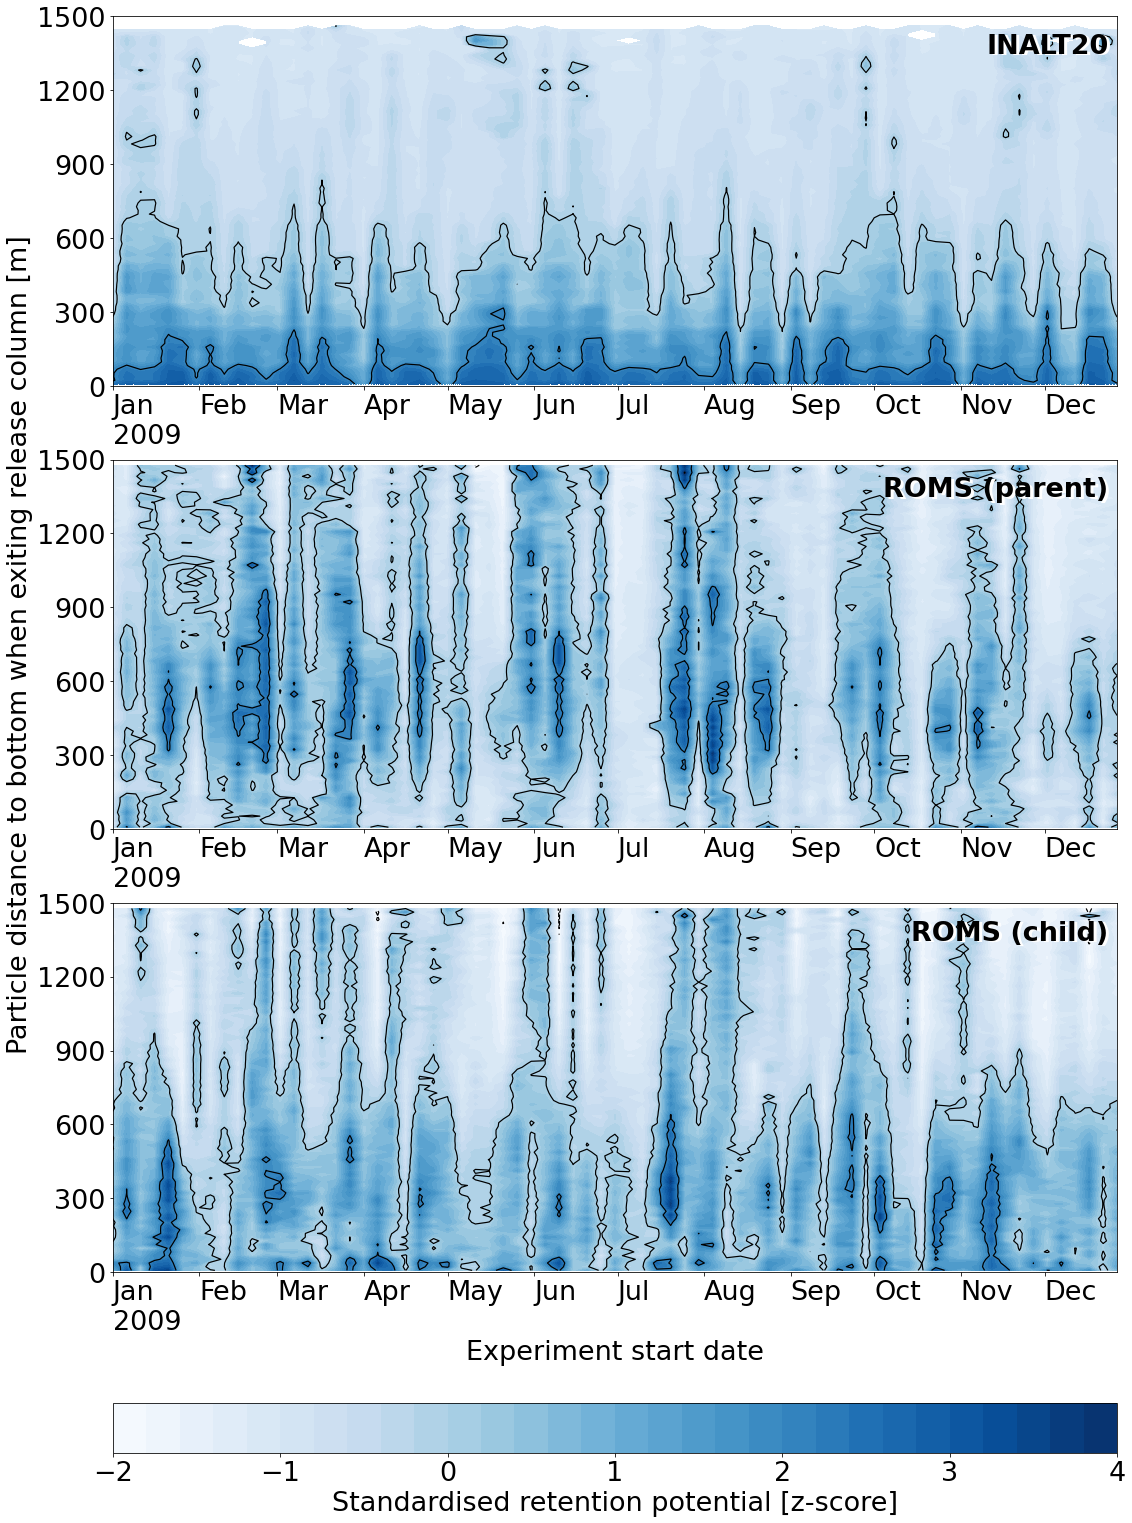

In [108]:
plt.rcParams['font.size'] = 27

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(18, 30))

cmap = plt.get_cmap('Blues')  # Verwenden Sie Ihre bevorzugte Farbkarte
xlabel = 'Experiment start date'
xticksloc = ['2009-01','2009-02','2009-03','2009-04','2009-05','2009-06','2009-07','2009-08','2009-09','2009-10','2009-11','2009-12']
xtickslab = ['Jan\n2009', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
yticksloc = [0,300,600,900,1200,1500]

# Plot 1
cf = ax1.contourf(binned_df.index, depth_midpoints, ((binned_df.values.T-(binned_df.values[~np.isnan(binned_df.values)].mean()))/(binned_df.values[~np.isnan(binned_df.values)].std())), cmap=cmap, levels=np.linspace(-2, 4, 31))
ax1.contour(binned_df.index, depth_midpoints, ((binned_df.values.T-(binned_df.values[~np.isnan(binned_df.values)].mean()))/(binned_df.values[~np.isnan(binned_df.values)].std())), colors='black', levels=np.linspace(-2, 4, 4),linewidths=1.2)
ax1.set_xticks(xticksloc,xtickslab,horizontalalignment='left')
ax1.set_yticks(yticksloc)
ax1.text(pd.to_datetime('2009-12-25'),1345,'INALT20',horizontalalignment='right', fontweight='bold',color='white')
ax1.text(pd.to_datetime('2009-12-24'),1350,'INALT20',horizontalalignment='right', fontweight='bold')
#plt.title('INALT20')

# Plot 2
cf = ax2.contourf(binned_df_ROMS.index, depth_midpoints_ROMS, ((binned_df_ROMS.values.T-binned_df_ROMS.values.mean())/binned_df_ROMS.values.std()), cmap=cmap, levels=np.linspace(-2, 4, 31))
ax2.contour(binned_df_ROMS.index, depth_midpoints_ROMS, ((binned_df_ROMS.values.T-binned_df_ROMS.values.mean())/binned_df_ROMS.values.std()), colors='black', levels=np.linspace(-2, 4, 4),linewidths=1.2)
ax2.set_xticks(xticksloc,xtickslab,horizontalalignment='left')
ax2.set_ylabel('Particle distance to bottom when exiting release column [m]')
ax2.set_yticks(yticksloc) 
ax2.text(pd.to_datetime('2009-12-25'),1345,'ROMS (parent)',horizontalalignment='right', fontweight='bold',color='white')
ax2.text(pd.to_datetime('2009-12-24'),1350,'ROMS (parent)',horizontalalignment='right', fontweight='bold')

# Plot 3
cf = ax3.contourf(binned_df_ROMSchild.index, depth_midpoints_ROMSchild, ((binned_df_ROMSchild.values.T-binned_df_ROMSchild.values.mean())/binned_df_ROMSchild.values.std()), cmap=cmap, levels=np.linspace(-2, 4, 31))
ax3.contour(binned_df_ROMSchild.index, depth_midpoints_ROMSchild, ((binned_df_ROMSchild.values.T-binned_df_ROMSchild.values.mean())/binned_df_ROMSchild.values.std()), colors='black', levels=np.linspace(-2, 4, 4),linewidths=1.2)
ax3.set_xlabel(xlabel)
ax3.set_xticks(xticksloc,xtickslab,horizontalalignment='left')
ax3.set_yticks(yticksloc)
ax3.text(pd.to_datetime('2009-12-25'),1345,'ROMS (child)',horizontalalignment='right', fontweight='bold',color='white')
ax3.text(pd.to_datetime('2009-12-24'),1350,'ROMS (child)',horizontalalignment='right', fontweight='bold')

cbar = plt.colorbar(cf, ax=[ax1, ax2, ax3], orientation='horizontal', pad=0.08, ticks=np.linspace(-2, 4, 7))
cbar.set_label('Standardised retention potential [z-score]')

plt.savefig('../../output_data/rp-depths.pdf', bbox_inches='tight')
